In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from warnings import filterwarnings
filterwarnings('ignore')

2024-10-03 02:00:12.163789: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-03 02:00:12.182179: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-03 02:00:12.186828: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-03 02:00:13.476963: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '/home/yagiz/Notebooks/source/VSCodeProjects/GithubDeepLearning/Datasets/training_set',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 8000 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        '/home/yagiz/Notebooks/source/VSCodeProjects/GithubDeepLearning/Datasets/test_set',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
  

Found 2000 images belonging to 2 classes.


In [4]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [5]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

I0000 00:00:1727910021.521842    7034 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727910021.576623    7034 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727910021.576755    7034 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727910021.579671    7034 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727910021.579811    7034 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [6]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history=model.fit(train_generator,steps_per_epoch=100,epochs=30,validation_data=test_generator,validation_steps=50)

Epoch 1/30


I0000 00:00:1727910384.690144    7220 service.cc:146] XLA service 0x7f193000b440 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727910384.690190    7220 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6


  6/100 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - acc: 0.5256 - loss: 0.7163

I0000 00:00:1727910388.175454    7220 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - acc: 0.5028 - loss: 0.6982 - val_acc: 0.4930 - val_loss: 0.6948
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - acc: 0.5449 - loss: 0.6859 - val_acc: 0.5290 - val_loss: 0.6751
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - acc: 0.5869 - loss: 0.6728
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - acc: 0.6346 - loss: 0.6488 - val_acc: 0.6100 - val_loss: 0.6522
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.5900 - val_loss: 0.6561
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - acc: 0.6720 - loss: 0.6141
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - acc: 0.6610 - loss: 0.6123 - val_acc: 0.6860 - val_loss: 0.5808
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - acc: 0.7018 - loss: 0.5724 - val_acc: 0.6690 - val_loss: 0.5885
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - acc: 0.6796 - loss: 0.5960
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s

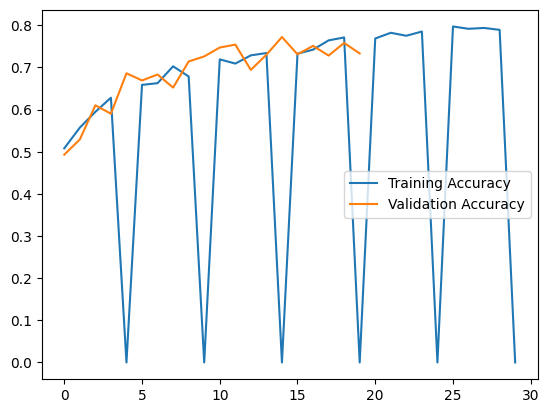

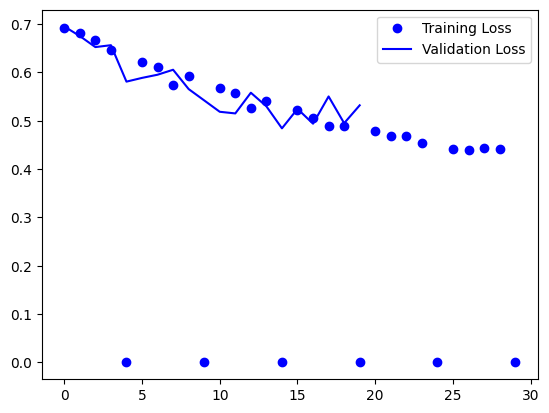

In [9]:
plt.plot(history.history['acc'],label='Training Accuracy')
plt.plot(history.history['val_acc'],label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'],"bo",label='Training Loss')
plt.plot(history.history['val_loss'],"b",label='Validation Loss')
plt.legend()
plt.show()


In [61]:
model.save('cats_and_dogs_small_1.h5')

In [62]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
train_generator = train_datagen.flow_from_directory(
        '/home/yagiz/Notebooks/source/VSCodeProjects/GithubDeepLearning/Datasets/training_set',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        '/home/yagiz/Notebooks/source/VSCodeProjects/GithubDeepLearning/Datasets/test_set',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [63]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [64]:
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])


In [65]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_44 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_44 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
model.fit(train_generator,steps_per_epoch=100,epochs=100,validation_data=test_generator,validation_steps=50)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 162ms/step - acc: 0.5095 - loss: 0.6943 - val_acc: 0.5050 - val_loss: 0.6888
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 146ms/step - acc: 0.5324 - loss: 0.6905 - val_acc: 0.5925 - val_loss: 0.6778
Epoch 3/100
  3/100 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - acc: 0.5573 - loss: 0.6830

2024-10-02 23:33:18.483477: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:33:18.483582: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - acc: 0.5592 - loss: 0.6852 - val_acc: 0.6031 - val_loss: 0.6756
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 144ms/step - acc: 0.5691 - loss: 0.6792 - val_acc: 0.6125 - val_loss: 0.6625
Epoch 5/100
  1/100 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - acc: 0.6250 - loss: 0.6733

2024-10-02 23:33:41.369783: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:33:41.369875: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 160ms/step - acc: 0.5941 - loss: 0.6711 - val_acc: 0.6275 - val_loss: 0.6499
Epoch 6/100
 49/100 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - acc: 0.6035 - loss: 0.6672

2024-10-02 23:34:03.045131: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:34:03.045248: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - acc: 0.6065 - loss: 0.6645 - val_acc: 0.5925 - val_loss: 0.6712
Epoch 7/100


2024-10-02 23:34:03.379481: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:34:03.379582: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 158ms/step - acc: 0.6225 - loss: 0.6563 - val_acc: 0.5706 - val_loss: 0.6866
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 142ms/step - acc: 0.6236 - loss: 0.6428 - val_acc: 0.5800 - val_loss: 0.6575
Epoch 9/100
  3/100 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - acc: 0.6875 - loss: 0.6262

2024-10-02 23:34:34.263004: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:34:34.263084: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


 49/100 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - acc: 0.6415 - loss: 0.6425

2024-10-02 23:34:40.482930: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:34:40.483028: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - acc: 0.6372 - loss: 0.6442 - val_acc: 0.6319 - val_loss: 0.6329
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 144ms/step - acc: 0.6309 - loss: 0.6308 - val_acc: 0.6150 - val_loss: 0.6410
Epoch 11/100
  3/100 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - acc: 0.6649 - loss: 0.6107

2024-10-02 23:34:57.533065: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:34:57.533162: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 157ms/step - acc: 0.6321 - loss: 0.6333 - val_acc: 0.6519 - val_loss: 0.6152
Epoch 12/100
 49/100 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - acc: 0.6459 - loss: 0.6303

2024-10-02 23:35:18.812652: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:35:18.812769: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - acc: 0.6617 - loss: 0.6201 - val_acc: 0.6375 - val_loss: 0.6190
Epoch 13/100


2024-10-02 23:35:19.123918: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:35:19.124019: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 154ms/step - acc: 0.6460 - loss: 0.6237 - val_acc: 0.6981 - val_loss: 0.5775
Epoch 14/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 140ms/step - acc: 0.6525 - loss: 0.6180 - val_acc: 0.6525 - val_loss: 0.5913
Epoch 15/100
  3/100 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - acc: 0.6562 - loss: 0.6177

2024-10-02 23:35:49.371379: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:35:49.371514: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


 49/100 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - acc: 0.6247 - loss: 0.6370

2024-10-02 23:35:55.226075: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:35:55.226182: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - acc: 0.6360 - loss: 0.6271 - val_acc: 0.6637 - val_loss: 0.6034
Epoch 16/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 145ms/step - acc: 0.6839 - loss: 0.5887 - val_acc: 0.7175 - val_loss: 0.5590
Epoch 17/100
  3/100 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - acc: 0.7413 - loss: 0.5363

2024-10-02 23:36:12.289784: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-10-02 23:36:12.289876: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:36:12.289930: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 155ms/step - acc: 0.6890 - loss: 0.5847 - val_acc: 0.6981 - val_loss: 0.5649
Epoch 18/100
 49/100 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - acc: 0.6659 - loss: 0.5807

2024-10-02 23:36:33.328094: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:36:33.328182: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - acc: 0.6712 - loss: 0.5816 - val_acc: 0.7325 - val_loss: 0.5611
Epoch 19/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 155ms/step - acc: 0.6905 - loss: 0.5818 - val_acc: 0.7356 - val_loss: 0.5294
Epoch 20/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 138ms/step - acc: 0.6863 - loss: 0.5807 - val_acc: 0.7100 - val_loss: 0.5690
Epoch 21/100
  3/100 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - acc: 0.7014 - loss: 0.5516

2024-10-02 23:37:03.793373: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:37:03.793467: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - acc: 0.6766 - loss: 0.5939 - val_acc: 0.7269 - val_loss: 0.5488
Epoch 22/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 147ms/step - acc: 0.6940 - loss: 0.5670 - val_acc: 0.7200 - val_loss: 0.5422
Epoch 23/100
  3/100 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - acc: 0.7847 - loss: 0.5263

2024-10-02 23:37:26.922663: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:37:26.922751: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 153ms/step - acc: 0.7041 - loss: 0.5786 - val_acc: 0.7069 - val_loss: 0.5692
Epoch 24/100
 49/100 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - acc: 0.6916 - loss: 0.5741

2024-10-02 23:37:47.825787: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:37:47.825867: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - acc: 0.6869 - loss: 0.5747 - val_acc: 0.7025 - val_loss: 0.5488
Epoch 25/100


2024-10-02 23:37:48.136396: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:37:48.136498: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 158ms/step - acc: 0.6970 - loss: 0.5758 - val_acc: 0.7169 - val_loss: 0.5467
Epoch 26/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 140ms/step - acc: 0.7022 - loss: 0.5755 - val_acc: 0.7375 - val_loss: 0.5037
Epoch 27/100
  3/100 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - acc: 0.6806 - loss: 0.5871

2024-10-02 23:38:18.682036: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:38:18.682118: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


 49/100 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - acc: 0.6897 - loss: 0.5700

2024-10-02 23:38:24.746325: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:38:24.746461: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - acc: 0.6978 - loss: 0.5678 - val_acc: 0.7544 - val_loss: 0.5083
Epoch 28/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 141ms/step - acc: 0.7212 - loss: 0.5530 - val_acc: 0.7300 - val_loss: 0.5366
Epoch 29/100
  3/100 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - acc: 0.6806 - loss: 0.5136

2024-10-02 23:38:41.358149: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:38:41.358233: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 154ms/step - acc: 0.6992 - loss: 0.5641 - val_acc: 0.7350 - val_loss: 0.5248
Epoch 30/100
 49/100 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - acc: 0.7327 - loss: 0.5445

2024-10-02 23:39:02.424740: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:39:02.424841: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - acc: 0.7259 - loss: 0.5488 - val_acc: 0.7000 - val_loss: 0.5560
Epoch 31/100


2024-10-02 23:39:02.762134: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:39:02.762219: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 152ms/step - acc: 0.7035 - loss: 0.5636 - val_acc: 0.7250 - val_loss: 0.5377
Epoch 32/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 149ms/step - acc: 0.7325 - loss: 0.5419 - val_acc: 0.7375 - val_loss: 0.5114
Epoch 33/100
  3/100 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - acc: 0.7535 - loss: 0.5318

2024-10-02 23:39:33.688232: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:39:33.688317: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


 49/100 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - acc: 0.7472 - loss: 0.5371

2024-10-02 23:39:39.074035: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:39:39.074180: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - acc: 0.7384 - loss: 0.5427 - val_acc: 0.7569 - val_loss: 0.5027
Epoch 34/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 117ms/step - acc: 0.7115 - loss: 0.5611 - val_acc: 0.7350 - val_loss: 0.5149
Epoch 35/100
  3/100 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - acc: 0.7622 - loss: 0.5242

2024-10-02 23:39:52.911955: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:39:52.912047: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 128ms/step - acc: 0.7319 - loss: 0.5367 - val_acc: 0.7506 - val_loss: 0.5151
Epoch 36/100
 49/100 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - acc: 0.7105 - loss: 0.5612

2024-10-02 23:40:10.348818: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:40:10.348905: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - acc: 0.7109 - loss: 0.5572 - val_acc: 0.7675 - val_loss: 0.4848
Epoch 37/100


2024-10-02 23:40:10.641459: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:40:10.641543: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 127ms/step - acc: 0.7177 - loss: 0.5362 - val_acc: 0.6919 - val_loss: 0.5989
Epoch 38/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - acc: 0.6924 - loss: 0.5702 - val_acc: 0.7025 - val_loss: 0.5705
Epoch 39/100
  4/100 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - acc: 0.6484 - loss: 0.5679

2024-10-02 23:40:35.385826: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:40:35.385900: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


 49/100 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - acc: 0.7085 - loss: 0.5395 

2024-10-02 23:40:40.150372: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - acc: 0.7106 - loss: 0.5414 - val_acc: 0.7300 - val_loss: 0.5258
Epoch 40/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 115ms/step - acc: 0.7222 - loss: 0.5358 - val_acc: 0.8275 - val_loss: 0.4315
Epoch 41/100
  3/100 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - acc: 0.7535 - loss: 0.4919

2024-10-02 23:40:53.567710: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:40:53.567784: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step - acc: 0.7340 - loss: 0.5245 - val_acc: 0.7619 - val_loss: 0.4765
Epoch 42/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - acc: 0.7117 - loss: 0.5514 - val_acc: 0.7450 - val_loss: 0.4932
Epoch 43/100


2024-10-02 23:41:11.262791: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:41:11.262864: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 121ms/step - acc: 0.7248 - loss: 0.5317 - val_acc: 0.7419 - val_loss: 0.5057
Epoch 44/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - acc: 0.7369 - loss: 0.5211 - val_acc: 0.7725 - val_loss: 0.5137
Epoch 45/100
  4/100 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - acc: 0.7780 - loss: 0.4457

2024-10-02 23:41:35.261554: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:41:35.261628: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


 49/100 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - acc: 0.7576 - loss: 0.5051

2024-10-02 23:41:39.941083: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:41:39.941178: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - acc: 0.7464 - loss: 0.5173 - val_acc: 0.7487 - val_loss: 0.4994
Epoch 46/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 113ms/step - acc: 0.7331 - loss: 0.5317 - val_acc: 0.7775 - val_loss: 0.4693
Epoch 47/100
  3/100 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - acc: 0.6701 - loss: 0.5950

2024-10-02 23:41:53.439898: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:41:53.439990: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - acc: 0.7424 - loss: 0.5248 - val_acc: 0.7844 - val_loss: 0.4594
Epoch 48/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - acc: 0.7445 - loss: 0.5185 - val_acc: 0.7725 - val_loss: 0.4872
Epoch 49/100


2024-10-02 23:42:10.678322: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:42:10.678409: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 121ms/step - acc: 0.7386 - loss: 0.5241 - val_acc: 0.7788 - val_loss: 0.4621
Epoch 50/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - acc: 0.7428 - loss: 0.5068 - val_acc: 0.7700 - val_loss: 0.4692
Epoch 51/100
  4/100 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - acc: 0.7604 - loss: 0.4956

2024-10-02 23:42:34.773789: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:42:34.773859: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


 49/100 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - acc: 0.7505 - loss: 0.5044

2024-10-02 23:42:39.414803: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - acc: 0.7461 - loss: 0.5104 - val_acc: 0.8012 - val_loss: 0.4433
Epoch 52/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 114ms/step - acc: 0.7156 - loss: 0.5326 - val_acc: 0.8000 - val_loss: 0.4463
Epoch 53/100
  3/100 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - acc: 0.7344 - loss: 0.5453

2024-10-02 23:42:52.859723: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:42:52.859808: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 120ms/step - acc: 0.7566 - loss: 0.5074 - val_acc: 0.7825 - val_loss: 0.4567
Epoch 54/100
 49/100 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - acc: 0.7262 - loss: 0.5406

2024-10-02 23:43:09.251923: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:43:09.252021: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - acc: 0.7317 - loss: 0.5301 - val_acc: 0.7700 - val_loss: 0.4919
Epoch 55/100


2024-10-02 23:43:09.515345: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:43:09.515444: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - acc: 0.7308 - loss: 0.5159 - val_acc: 0.7919 - val_loss: 0.4462
Epoch 56/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - acc: 0.7539 - loss: 0.5062 - val_acc: 0.7400 - val_loss: 0.4954
Epoch 57/100
  3/100 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - acc: 0.7066 - loss: 0.5373

2024-10-02 23:43:33.807452: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:43:33.807538: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


 49/100 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - acc: 0.7340 - loss: 0.5143

2024-10-02 23:43:38.427931: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:43:38.428017: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - acc: 0.7377 - loss: 0.5113 - val_acc: 0.7837 - val_loss: 0.4630
Epoch 58/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - acc: 0.7374 - loss: 0.5077 - val_acc: 0.7925 - val_loss: 0.4628
Epoch 59/100
  3/100 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - acc: 0.7188 - loss: 0.5266

2024-10-02 23:43:51.439029: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:43:51.439111: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 119ms/step - acc: 0.7583 - loss: 0.4975 - val_acc: 0.7962 - val_loss: 0.4390
Epoch 60/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - acc: 0.7686 - loss: 0.4764 - val_acc: 0.8025 - val_loss: 0.4316
Epoch 61/100


2024-10-02 23:44:08.068862: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:44:08.068947: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 125ms/step - acc: 0.7522 - loss: 0.4960 - val_acc: 0.7994 - val_loss: 0.4374
Epoch 62/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - acc: 0.7658 - loss: 0.4882 - val_acc: 0.8125 - val_loss: 0.4467
Epoch 63/100
  4/100 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - acc: 0.7552 - loss: 0.4731

2024-10-02 23:44:32.208981: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:44:32.209066: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


 49/100 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - acc: 0.7493 - loss: 0.5102

2024-10-02 23:44:36.805925: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:44:36.806014: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - acc: 0.7500 - loss: 0.5141 - val_acc: 0.7725 - val_loss: 0.4602
Epoch 64/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 112ms/step - acc: 0.7590 - loss: 0.4980 - val_acc: 0.7675 - val_loss: 0.4687
Epoch 65/100
  3/100 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - acc: 0.7656 - loss: 0.5202

2024-10-02 23:44:49.969573: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:44:49.969706: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 120ms/step - acc: 0.7617 - loss: 0.4882 - val_acc: 0.7669 - val_loss: 0.4843
Epoch 66/100
 49/100 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - acc: 0.7713 - loss: 0.4845

2024-10-02 23:45:06.289991: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:45:06.290085: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - acc: 0.7703 - loss: 0.4809 - val_acc: 0.7325 - val_loss: 0.5709
Epoch 67/100


2024-10-02 23:45:06.551883: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:45:06.551962: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 120ms/step - acc: 0.7563 - loss: 0.5144 - val_acc: 0.8069 - val_loss: 0.4258
Epoch 68/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - acc: 0.7428 - loss: 0.4980 - val_acc: 0.8175 - val_loss: 0.4189
Epoch 69/100
  4/100 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - acc: 0.8021 - loss: 0.4647

2024-10-02 23:45:30.288365: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:45:30.288440: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


 50/100 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - acc: 0.7778 - loss: 0.4767

2024-10-02 23:45:34.837183: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:45:34.837269: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - acc: 0.7745 - loss: 0.4808 - val_acc: 0.7937 - val_loss: 0.4442
Epoch 70/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 111ms/step - acc: 0.7386 - loss: 0.5108 - val_acc: 0.8150 - val_loss: 0.4284
Epoch 71/100
  3/100 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - acc: 0.8177 - loss: 0.4104

2024-10-02 23:45:47.897378: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:45:47.897459: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - acc: 0.7629 - loss: 0.4792 - val_acc: 0.7912 - val_loss: 0.4404
Epoch 72/100
 49/100 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - acc: 0.7799 - loss: 0.4846

2024-10-02 23:46:04.727245: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:46:04.727327: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - acc: 0.7761 - loss: 0.4850 - val_acc: 0.7925 - val_loss: 0.4579
Epoch 73/100


2024-10-02 23:46:04.972589: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:46:04.972675: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 120ms/step - acc: 0.7784 - loss: 0.4670 - val_acc: 0.8131 - val_loss: 0.4161
Epoch 74/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 112ms/step - acc: 0.7820 - loss: 0.4869 - val_acc: 0.7900 - val_loss: 0.4297
Epoch 75/100
  4/100 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - acc: 0.8079 - loss: 0.4338

2024-10-02 23:46:28.837445: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:46:28.837529: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


 49/100 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - acc: 0.7850 - loss: 0.4544

2024-10-02 23:46:33.505587: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:46:33.505697: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - acc: 0.7821 - loss: 0.4624 - val_acc: 0.8037 - val_loss: 0.4241
Epoch 76/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 108ms/step - acc: 0.7605 - loss: 0.4795 - val_acc: 0.8025 - val_loss: 0.4116
Epoch 77/100
  3/100 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - acc: 0.8264 - loss: 0.4372

2024-10-02 23:46:46.301830: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:46:46.301924: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 128ms/step - acc: 0.7848 - loss: 0.4728 - val_acc: 0.8019 - val_loss: 0.4239
Epoch 78/100
 50/100 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - acc: 0.7988 - loss: 0.4538 

2024-10-02 23:47:03.903359: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:47:03.903451: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - acc: 0.7903 - loss: 0.4588 - val_acc: 0.8125 - val_loss: 0.4047
Epoch 79/100


2024-10-02 23:47:04.191922: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:47:04.191998: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 122ms/step - acc: 0.7565 - loss: 0.4909 - val_acc: 0.8125 - val_loss: 0.4107
Epoch 80/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - acc: 0.7663 - loss: 0.4841 - val_acc: 0.8075 - val_loss: 0.4098
Epoch 81/100
 50/100 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - acc: 0.7685 - loss: 0.4866 

2024-10-02 23:47:33.241362: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - acc: 0.7724 - loss: 0.4808 - val_acc: 0.8075 - val_loss: 0.4057
Epoch 82/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 108ms/step - acc: 0.7764 - loss: 0.4843 - val_acc: 0.8550 - val_loss: 0.3572
Epoch 83/100
  3/100 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - acc: 0.7431 - loss: 0.5468

2024-10-02 23:47:46.136555: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:47:46.136650: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - acc: 0.7778 - loss: 0.4792 - val_acc: 0.8150 - val_loss: 0.3997
Epoch 84/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - acc: 0.7586 - loss: 0.4919 - val_acc: 0.8500 - val_loss: 0.3779
Epoch 85/100


2024-10-02 23:48:03.538888: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:48:03.538979: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 122ms/step - acc: 0.7729 - loss: 0.4660 - val_acc: 0.8194 - val_loss: 0.3961
Epoch 86/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - acc: 0.7875 - loss: 0.4596 - val_acc: 0.8125 - val_loss: 0.4091
Epoch 87/100
  4/100 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - acc: 0.7214 - loss: 0.5275

2024-10-02 23:48:27.472305: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:48:27.472377: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


 49/100 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - acc: 0.7725 - loss: 0.4778

2024-10-02 23:48:32.096587: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:48:32.096667: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - acc: 0.7785 - loss: 0.4697 - val_acc: 0.8106 - val_loss: 0.4059
Epoch 88/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 111ms/step - acc: 0.7662 - loss: 0.4697 - val_acc: 0.8175 - val_loss: 0.3967
Epoch 89/100
  3/100 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - acc: 0.7361 - loss: 0.5014

2024-10-02 23:48:45.232739: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:48:45.232823: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 119ms/step - acc: 0.7782 - loss: 0.4520 - val_acc: 0.8269 - val_loss: 0.4009
Epoch 90/100
 50/100 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - acc: 0.7675 - loss: 0.4650

2024-10-02 23:49:01.530943: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:49:01.531069: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - acc: 0.7744 - loss: 0.4599 - val_acc: 0.8150 - val_loss: 0.3776
Epoch 91/100


2024-10-02 23:49:01.801206: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:49:01.801305: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - acc: 0.7853 - loss: 0.4535 - val_acc: 0.8344 - val_loss: 0.3729
Epoch 92/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - acc: 0.8020 - loss: 0.4419 - val_acc: 0.8250 - val_loss: 0.3740
Epoch 93/100
  4/100 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - acc: 0.7487 - loss: 0.4887

2024-10-02 23:49:25.843338: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:49:25.843408: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


 49/100 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - acc: 0.7671 - loss: 0.4628

2024-10-02 23:49:30.510092: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-10-02 23:49:30.510179: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:49:30.510227: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - acc: 0.7731 - loss: 0.4575 - val_acc: 0.7538 - val_loss: 0.5011
Epoch 94/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 112ms/step - acc: 0.7815 - loss: 0.4630 - val_acc: 0.8475 - val_loss: 0.3460
Epoch 95/100
  3/100 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - acc: 0.8472 - loss: 0.3675

2024-10-02 23:49:43.810708: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:49:43.810794: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 119ms/step - acc: 0.7869 - loss: 0.4569 - val_acc: 0.8094 - val_loss: 0.4064
Epoch 96/100
 50/100 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - acc: 0.7749 - loss: 0.4504

2024-10-02 23:50:00.088045: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:50:00.088118: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - acc: 0.7737 - loss: 0.4558 - val_acc: 0.8200 - val_loss: 0.3949
Epoch 97/100


2024-10-02 23:50:00.346011: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - acc: 0.7947 - loss: 0.4444 - val_acc: 0.8294 - val_loss: 0.3723
Epoch 98/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - acc: 0.7975 - loss: 0.4400 - val_acc: 0.8025 - val_loss: 0.4267
Epoch 99/100
  4/100 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - acc: 0.7214 - loss: 0.4799

2024-10-02 23:50:24.241471: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


 49/100 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - acc: 0.7925 - loss: 0.4230

2024-10-02 23:50:28.833748: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:50:28.833852: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - acc: 0.7916 - loss: 0.4309 - val_acc: 0.8131 - val_loss: 0.4166
Epoch 100/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 111ms/step - acc: 0.7946 - loss: 0.4362 - val_acc: 0.8325 - val_loss: 0.3658


2024-10-02 23:50:41.953587: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13817235534796321835
2024-10-02 23:50:41.953673: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 14783517153329053019


In [67]:
history=model.history

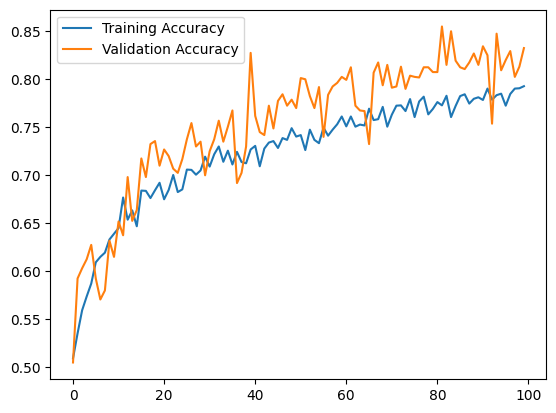

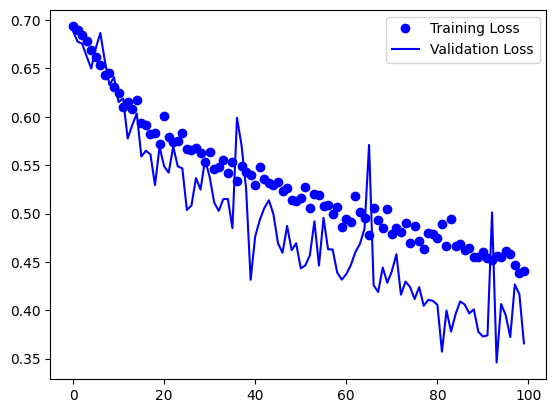

In [68]:
plt.plot(history.history['acc'],label='Training Accuracy')
plt.plot(history.history['val_acc'],label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'],"bo",label='Training Loss')
plt.plot(history.history['val_loss'],"b",label='Validation Loss')
plt.legend()
plt.show()

model.save('cats_and_dogs_small_2.h5')

In [1]:
from keras.applications import VGG16

2024-10-07 17:36:15.966843: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-07 17:36:15.985649: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-07 17:36:15.990111: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-07 17:36:16.006050: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-07 17:36:18.861187: W tensorflow/compiler/tf2

In [2]:
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))


I0000 00:00:1728311782.098547   25647 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728311782.147820   25647 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728311782.147907   25647 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728311782.150732   25647 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1728311782.150787   25647 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [3]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
import tensorflow as tf

In [5]:
model=tf.keras.models.Sequential([
    conv_base,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [6]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/home/yagiz/Notebooks/source/VSCodeProjects/GithubDeepLearning/Datasets/training_set',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
test_generator = test_datagen.flow_from_directory(
        '/home/yagiz/Notebooks/source/VSCodeProjects/GithubDeepLearning/Datasets/test_set',
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

    


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [12]:
from keras.optimizers import RMSprop

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 9,177,089 (35.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

Hassas Ayar(Fine tuning)

In [14]:
conv_base.trainable=False
set_trainable=False
for layer in conv_base.layers:
    if layer.name=='block5_conv1':
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False


In [15]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=1e-5),metrics=['acc'])

In [16]:
model.fit(train_generator,steps_per_epoch=100,epochs=30,validation_data=test_generator,validation_steps=50)

Epoch 1/30


/home/yagiz/Anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1728311856.448696   25819 service.cc:146] XLA service 0x7fccb000df80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728311856.448753   25819 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2024-10-07 17:37:36.483191: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-07 17:37:36.678747: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8

  3/100 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - acc: 0.4583 - loss: 0.7717

I0000 00:00:1728311860.300190   25819 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 98ms/step - acc: 0.6715 - loss: 0.6044 - val_acc: 0.8560 - val_loss: 0.3424
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - acc: 0.8072 - loss: 0.4167 - val_acc: 0.8840 - val_loss: 0.2743
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - acc: 0.8543 - loss: 0.3291
Epoch 4/30
  2/100 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - acc: 0.8625 - loss: 0.2610

2024-10-07 17:38:07.666310: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-07 17:38:07.666371: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-10-07 17:38:07.666388: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15428431338265436417
2024-10-07 17:38:07.666419: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 432961346770581522
/home/yagiz/Anaconda3/envs/tf/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.ge

100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - acc: 0.8413 - loss: 0.3409 - val_acc: 0.8830 - val_loss: 0.2735
Epoch 5/30


2024-10-07 17:38:16.461395: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-10-07 17:38:16.461446: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15428431338265436417
2024-10-07 17:38:16.461481: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 432961346770581522


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.9030 - val_loss: 0.2338
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - acc: 0.8605 - loss: 0.3191
Epoch 7/30
  2/100 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - acc: 0.8500 - loss: 0.3274

2024-10-07 17:38:26.030897: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15428431338265436417
2024-10-07 17:38:26.030974: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 432961346770581522


100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 107ms/step - acc: 0.8666 - loss: 0.2968 - val_acc: 0.9180 - val_loss: 0.2119
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - acc: 0.8748 - loss: 0.2894 - val_acc: 0.9000 - val_loss: 0.2110
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - acc: 0.8739 - loss: 0.2736
Epoch 10/30


2024-10-07 17:38:52.536408: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-10-07 17:38:52.536476: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15428431338265436417
2024-10-07 17:38:52.536521: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 432961346770581522
2024-10-07 17:38:52.545223: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15428431338265436417
2024-10-07 17:38:52.545294: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 432961346770581522


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.9270 - val_loss: 0.1740
Epoch 11/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - acc: 0.8984 - loss: 0.2396 - val_acc: 0.9190 - val_loss: 0.2263
Epoch 12/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - acc: 0.8976 - loss: 0.2458
Epoch 13/30
  2/100 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - acc: 0.9250 - loss: 0.2011

2024-10-07 17:39:12.735050: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15428431338265436417
2024-10-07 17:39:12.735121: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 432961346770581522


100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - acc: 0.9100 - loss: 0.2141 - val_acc: 0.9350 - val_loss: 0.1855
Epoch 14/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - acc: 0.9144 - loss: 0.2188 - val_acc: 0.9350 - val_loss: 0.1641
Epoch 15/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 116us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 16/30


2024-10-07 17:39:31.075109: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 432961346770581522
2024-10-07 17:39:31.079813: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-10-07 17:39:31.079879: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15428431338265436417
2024-10-07 17:39:31.079929: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 432961346770581522


100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 112ms/step - acc: 0.8991 - loss: 0.2250 - val_acc: 0.9240 - val_loss: 0.1690
Epoch 17/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - acc: 0.9136 - loss: 0.2138 - val_acc: 0.9380 - val_loss: 0.1507
Epoch 18/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - acc: 0.8970 - loss: 0.2248
Epoch 19/30
  1/100 ━━━━━━━━━━━━━━━━━━━━ 10s 110ms/step - acc: 0.9500 - loss: 0.2030

2024-10-07 17:39:59.324938: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15428431338265436417
2024-10-07 17:39:59.325077: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 432961346770581522


100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - acc: 0.9098 - loss: 0.2090 - val_acc: 0.9200 - val_loss: 0.1923
Epoch 20/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.9400 - val_loss: 0.1614
Epoch 21/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 91ms/step - acc: 0.9056 - loss: 0.2081
Epoch 22/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - acc: 0.9015 - loss: 0.2111 - val_acc: 0.9360 - val_loss: 0.1623
Epoch 23/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - acc: 0.9273 - loss: 0.1865 - val_acc: 0.9420 - val_loss: 0.1652
Epoch 24/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - acc: 0.9168 - loss: 0.1907
Epoch 25/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.9400 - val_loss: 0.1529
Epoch 26/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - acc: 0.9334 - loss: 0.1811 - val_acc: 0.9310 - val_loss: 0.1689
Epoch 27/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - acc: 0.9080 - loss: 0.2164
Epoch 28/30
  2/100 ━━━━━

2024-10-07 17:41:04.938401: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15428431338265436417
2024-10-07 17:41:04.938472: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 432961346770581522


100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - acc: 0.9288 - loss: 0.1818 - val_acc: 0.9310 - val_loss: 0.1760
Epoch 29/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - acc: 0.9193 - loss: 0.1909 - val_acc: 0.9300 - val_loss: 0.1581
Epoch 30/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 85us/step - acc: 0.0000e+00 - loss: 0.0000e+00


2024-10-07 17:41:23.756890: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-10-07 17:41:23.756966: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 15428431338265436417


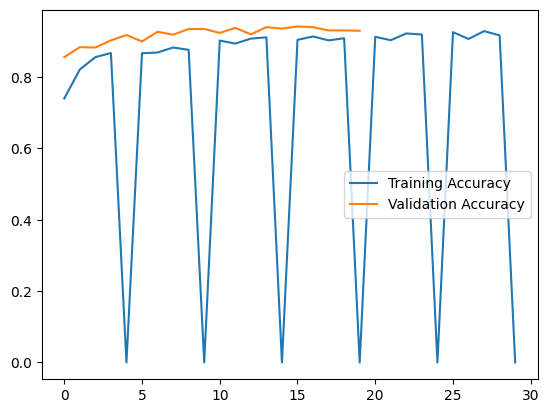

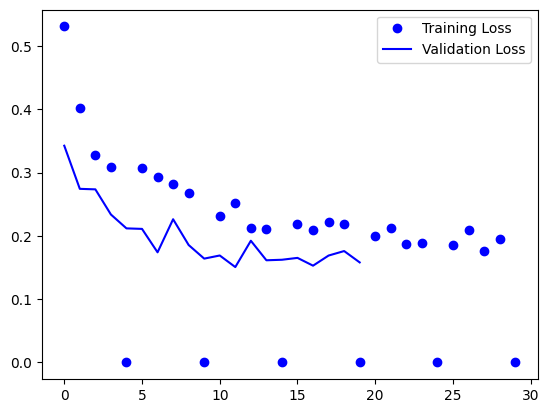

In [20]:
import matplotlib.pyplot as plt
history=model.history
plt.plot(history.history['acc'],label='Training Accuracy')
plt.plot(history.history['val_acc'],label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'],"bo",label='Training Loss')
plt.plot(history.history['val_loss'],"b",label='Validation Loss')
plt.legend()
plt.show()

model.save('cats_and_dogs_small_vgg16.keras')

